In [97]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Wczytywanie

In [98]:
import pathlib
data_dir = pathlib.Path('Images')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

30


# Podział danych

In [99]:
batch_size = 30
img_height = 255
img_width = 255

train = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 30 files belonging to 3 classes.
Using 24 files for training.


In [100]:
val = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 30 files belonging to 3 classes.
Using 6 files for validation.


## Wyciąganie klas

In [101]:
class_names = train.class_names

In [102]:
print(class_names)

['Klawiatura', 'Kubek', 'ksiazka']


# Model

In [103]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(len(class_names),activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(
  train,
  validation_data=val,
  epochs=20
)

Epoch 1/20


1/1 [==============================] - 1s 884ms/step - loss: 1.1052 - accuracy: 0.3750 - val_loss: 7.8566 - val_accuracy: 0.3333
Epoch 2/20
1/1 [==============================] - 0s 357ms/step - loss: 8.6959 - accuracy: 0.3333 - val_loss: 3.2540 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 356ms/step - loss: 3.8605 - accuracy: 0.2917 - val_loss: 2.6357 - val_accuracy: 0.1667
Epoch 4/20
1/1 [==============================] - 0s 362ms/step - loss: 1.5640 - accuracy: 0.5417 - val_loss: 2.9824 - val_accuracy: 0.1667
Epoch 5/20
1/1 [==============================] - 0s 365ms/step - loss: 1.5102 - accuracy: 0.4167 - val_loss: 1.6095 - val_accuracy: 0.1667
Epoch 6/20
1/1 [==============================] - 0s 362ms/step - loss: 0.6137 - accuracy: 0.6250 - val_loss: 0.9474 - val_accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 0s 369ms/step - loss: 0.3527 - accuracy: 1.0000 - val_loss: 0.8198 - val_accuracy: 0.5000
Epoch 8/20
1/1 [===============

# Augmentacja

In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_aug = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    )

train_gen = data_aug.flow_from_directory(
        data_dir,
        target_size=(255, 255),
        batch_size = 30,
        class_mode="categorical",
        color_mode = "grayscale")

Found 30 images belonging to 3 classes.


## Dopasowywanie modelu


In [105]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

x_train = []
y_train = []

for _ in range (20):
    img, label = next(train_gen)
    for __ in range(img.shape[0]):
        x_train.append(img[__])
        y_train.append(label[__])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [106]:
x_train.shape

(600, 255, 255, 1)

In [107]:
y_train.shape

(600, 3)

In [96]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

model = Sequential()
model.add(Conv2D(32, 1, activation='relu', input_shape=(img_height, img_width, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(64,1, activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128,1, activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(len(class_names),activation='sigmoid'))


model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,validation_split = 0.2, epochs = 20)


Epoch 1/20
15/15 [==============================] - 6s 341ms/step - loss: 1.5979 - accuracy: 0.3458 - val_loss: 1.1476 - val_accuracy: 0.3583
Epoch 2/20
15/15 [==============================] - 5s 339ms/step - loss: 1.0877 - accuracy: 0.4292 - val_loss: 1.0640 - val_accuracy: 0.4583
Epoch 3/20
15/15 [==============================] - 5s 345ms/step - loss: 1.0412 - accuracy: 0.4313 - val_loss: 1.0330 - val_accuracy: 0.3583
Epoch 4/20
15/15 [==============================] - 5s 349ms/step - loss: 0.9982 - accuracy: 0.4583 - val_loss: 1.0111 - val_accuracy: 0.4250
Epoch 5/20
15/15 [==============================] - 5s 350ms/step - loss: 0.9645 - accuracy: 0.5021 - val_loss: 1.0209 - val_accuracy: 0.4417
Epoch 6/20
15/15 [==============================] - 5s 353ms/step - loss: 0.9237 - accuracy: 0.5354 - val_loss: 1.0199 - val_accuracy: 0.4000
Epoch 7/20
15/15 [==============================] - 5s 344ms/step - loss: 0.8798 - accuracy: 0.5396 - val_loss: 1.0331 - val_accuracy: 0.3917
Epoch 

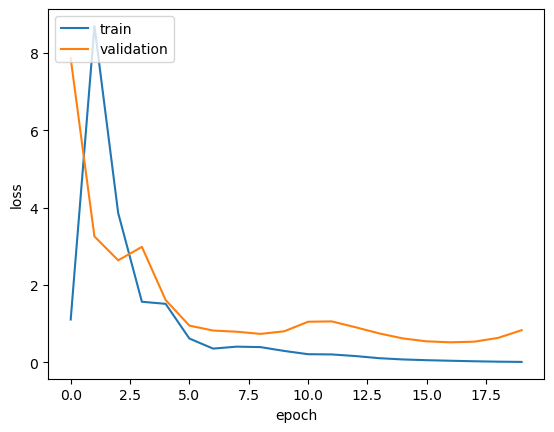

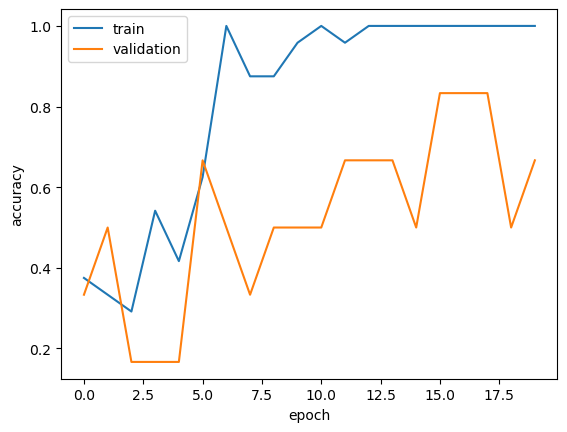

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()